# Crime Analysis in Chicago (2001 vs. 2016)

### OVERVIEW:
This project explored how the quantity and type of crime in Chicago areas changed between for the years 2003, 2007, 2008, 2009, 2010, 2011, 2012, and 2016. We picked the Top 10 crimes in Chicago dataset and focuesd on 2003, 2007, and 2016. We factored in the per capita income of different sections of Chicago using another dataset that includes the income per community area. This helped view how many and what kinds of different crimes occured based on income in certain neighborhoods.

### NAMES & IDs:
- Tiffany Streitenberger - A12779895
- Tianhao He - A13706875
- Shicheng Fan - A14824899
- Lingcong Shen - U08297242
- Nicholas Schenone - A13599911

### RESEARCH QUESTION:
How has the quantity and type of crime in Chicago areas changed between 2001 and 2016 and to what extent is it related to income per capita?

### HYPOTHESIS
 The quantity and number of violent crimes (specifically murder) have increased from 2001 to 2016. Additionally, areas with lower income per capita will experience a larger amount of crime.

### BACKGROUND & PRIOR WORK
This project is about crime statistics how the quantity and type of crime in Chicago areas changed between 2003 and 2016 and to what extent is it is related to income disparity? We plan to factor in the per capita income of different sections of Chicago using another dataset. This will help view how many and what kind of different crimes occur based on income in certain neighborhoods.

We are researching crime rates in Chicago to observe the crime throughout the years and compare the changes based on the dataset. Based on the Annual Report 2017 issued by the Chicago Police Office Department, major types of violent crimes are considered robbery, aggravated battery, aggrivated assult, rape and muder, burglary, motor vehicle theft, and arson. The main and most prevalent crimes that occur in Chicago are criminal homicides, public corruption, and political crimes.

Considering that high income areas may have better security systems and more reliable security services, we will try to incorporate income based on different locations to see how it influences the crime distribution. We hope to use a dataset that incorporates the income changes/distribution throughout Chicago. A research carried out by Voorhees Center described that, “Chicago’s high-income residents are increasingly concentrated on the city’s North side, while large swaths of the South and far West sides house most of Chicago’s low-income residents” (Nolan, 2015). The study also presented that, “The income distribution has fiercely changed. In 1970 ~2010, Middle income tracts shrunk from 46% to only 16% of the city. Very high income tracts grew from 4%  to 15% and very low income tracts, which was 17% of the city, swelled to 46%” (Nolan, 2015).

### DATASET(S)
In our analysis, we’ll be using three sources - one a data set on crime in, one an annual report on crime, and one a dataset on income per capita. This project will focus on the two main windows of years: (2003, 2007, 2016) and (2008-2012). The first list will be used for analysis of crime over time, as this is the beginning, middle, and end of our dataset. The second list will be used for analysis of crime with respect to income, as our income dataset is only based on that date range.

Chicago Police Department. “Crimes - 2001 to Present | City of Chicago | Data Portal.” Chicago Data Portal, 20 Apr. 2019, data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2.
- The first is a dataset collected, cleaned, and published by the city of Chicago that contains information on the type, location, and more on all of the crimes committed between 2001 and the present. The data itself is very thorough and from a relatively unbiased source (the police department). There are 6.8 million rows in the dataset, however we will only be using a smaller subset of the data (only the crimes in 2001 and 2018). Some of the categories in the data include a description of the crime, the date, if an arrest was made, the city block in which it happened, the location in the form of exact coordinates, and more.

Chicago Police Department. “Per Capita Income | City of Chicago | Data Portal.” Chicago Police Department, 2012, data.cityofchicago.org/Health-Human-Services/Per-Capita-Income/r6ad-wvtk.
- The second source we’ll be using is an annual report released by the Chicago Police department that is a summary on numerous topics including violent and property crime, case clearances, murder, firearms, arrests, and more. Specifically, we’ll be looking at the portion of the report that outlines crime due to gang violence. We intend to use the data in a more informal analysis in conjunction with the previous dataset in order to determine the effect of gang violence on the crime rate in Chicago. The report itself is from an official, unbiased source.

Chicago Police Department. “Chicago Police Department Annual Report 2017.” Chicago Police Department, 2017, home.chicagopolice.org/wp-content/uploads/2019/03/Chicago-Police-Department-Annual-Report-2017.pdf.
- The third source is also dataset released by the city of Chicago about information on income per capita - specifically with respect to each of the 77 community areas. Our first dataset on crime also specifies which community area the crime took place in, meaning we can use this socioeconomic data as a lens to view our data through, and possibly substantiate our argument. Like the first dataset, the data is very clean and from an unbiased source - the Chicago Police department.

### SETUP

In [77]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm_
import scipy
import seaborn as sns

# Plot settings
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 18}) # Set fontsize
plt.rcParams['figure.figsize'] = (25, 8) # set figure size

#### Load and format data

In [2]:
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_csv("data/crime_2008.csv")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_csv("data/crime_2009.csv")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_csv("data/crime_2010.csv")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_csv("data/crime_2011.csv")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_csv("data/crime_2012.csv")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"


datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

/Users/prettybeach/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Size

In [3]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))

Dataset: Crime in 2003, Shape: (475913, 22)
Dataset: Crime in 2007, Shape: (621848, 22)
Dataset: Crime in 2016, Shape: (265462, 22)


#### Missingness

In [4]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

Dataset: Crime in 2003
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       2
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      19
Community Area            50
FBI Code                   0
X Coordinate            4728
Y Coordinate            4728
Year                       0
Updated On                 0
Latitude                4728
Longitude               4728
Location                4728
dtype: int64


Dataset: Crime in 2007
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       5
Arrest                     0
Domestic                   0
Beat       

#### Set date as index

In [5]:
for dataset in datasets:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.set_index('Date', inplace=True)
    dataset.sort_index(inplace=True)
    print(dataset.name, "done")

for dataset in datasets_by_area:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.set_index('Date', inplace=True)
    dataset.sort_index(inplace=True)
    print(dataset.name, "done")

Crime in 2003 done
Crime in 2007 done
Crime in 2016 done
Crime in 2008 done
Crime in 2009 done
Crime in 2010 done
Crime in 2011 done
Crime in 2012 done


### DATA CLEANING
- What methods did you use to analyze your data? Briefly explain what steps you had to take before you were able to use the datasets you chose to answer your question of interest.
    - How 'clean' is the data?
    - What did you have to do to get the data into a usable format?
    - What pre-processing steps that were required for your methods (for example, checking data distributions and performing any transformations that may be required)

#### Remove rows with missing values

In [6]:
for dataset in datasets:
    dataset.dropna(inplace=True)
    
for dataset in datasets_by_area:
    dataset.dropna(inplace=True)

#### Remove unnecessary columns

In [7]:
for dataset in datasets:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

for dataset in datasets_by_area:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

#### Pickle dataframes for easier loading

In [8]:
for dataset in datasets:
    dataset.to_pickle("./data/crime_" + dataset.year + ".pkl")

for dataset in datasets_by_area:
    dataset.to_pickle("./data/crime_" + dataset.year + ".pkl")

#### Load pickles to bypass data loading/formatting

In [82]:
df_2003 = pd.read_pickle("./data/crime_2003.pkl")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_pickle("./data/crime_2007.pkl")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_pickle("./data/crime_2016.pkl")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_pickle("./data/crime_2008.pkl")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_pickle("./data/crime_2009.pkl")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_pickle("./data/crime_2010.pkl")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_pickle("./data/crime_2011.pkl")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_pickle("./data/crime_2012.pkl")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"

datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

datasets_all = [df_2003,
                df_2007,
                df_2008,
                df_2009,
                df_2010,
                df_2011,
                df_2012,
                df_2016]

#### Create population dataframe

In [83]:
year_list = list(map(str, [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]))
pop_list = [2866361, 2848996, 2824584, 2806391, 2811035, 2830026, 2851268, 2695598, 2705248, 2714856, 2718782, 2722389, 2720546, 2704958]

df_pop = pd.DataFrame({'Year': year_list,'Population': pop_list}).set_index('Year')
df_pop

,Population
Year,
2003,2866361
2004,2848996
2005,2824584
2006,2806391
2007,2811035
2008,2830026
2009,2851268
2010,2695598
2011,2705248


### DATA CLEANING PROCESS
Our data composed of about 7 million rows which provided an abundant amount of data. We disposed of the null value columns to minimize discrepencies in the data. This made our dataset more efficient and cleaner than the provided dataset on the Chicago Crimes website. It is still quite large, however this gives more accuracy and makes it easier to see and analyze the results.

We decided to analyze the years and pick the ones that provided the best results and easiest comparisons. 

The dataset was composed of 22 rows/categories, and we disposed of the ones that was not needed for comparison. This cut down immensely in data size. (As seen in the "Remove unnecessary columns" section above)

We pickled the dataframe to cut down on loadtime, which made the cleaning process and analysis more efficient.

For our income per capita dataset, it was a simple process in regards to cleaning the dataset because we just had to utilize the "communitties" and "income" columns. We simply disregarded the other rows and columns.

When we incorporated population size change per year to see if it affected the crime rate, we retrieved the data from:

   **Population data from: https://www.biggestuscities.com/city/chicago-illinois**

This did not require any data cleaning, just calculating percent crime based on population on the already existing number of crimes data.

### DATA ANALYSIS & RESULTS

#### ANALYSIS I: Number of crimes per year with respect to population

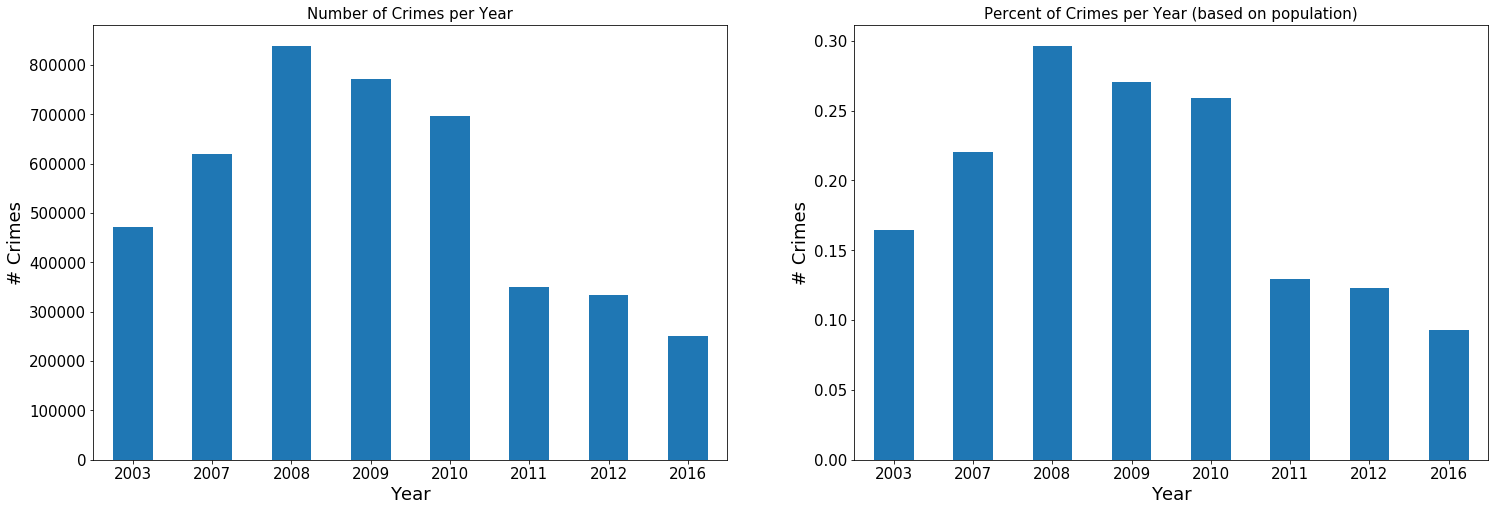

In [84]:
# Build lists for dataframe of year vs num crimes
years = []
data_len = []
for dataset in datasets_all:
    years.append(dataset.year)
    data_len.append(len(dataset))

# Create dataframe
df_num = pd.DataFrame({'Year': years,'Num Crimes': data_len}).set_index('Year')

# Join with poulation data
df_num = df_num.join(df_pop, how='outer')

# Drop rows not in year dataset
for index, row in df_num.iterrows():
    if index not in years:
        df_num.drop(index, inplace=True)

# Calculate percent crime based on population
df_num["Pct Crime"] = df_num["Num Crimes"] / df_num["Population"]

# Plot
fig, axs = plt.subplots(1,2)

df_num["Num Crimes"].plot(kind='bar', rot=0, ax=axs[0], title="Number of Crimes per Year").set_ylabel("# Crimes");
df_num["Pct Crime"].plot(kind='bar', rot=0, ax=axs[1], title="Percent of Crimes per Year (based on population)").set_ylabel("# Crimes");

#### Description
This histogram shows the number of crimes in 2003, 2007 and 2016. From the graph, 2007 has the largest number of crimes and the number in 2016 is the lowest. The number of crimes in 2003 is greater than that in 2016 but larger than in 2007.

By comparing the number of crimes per year from 2003-2016, we came across a potential issue of not factoring population change that occurs every year in Chicago. By taking that into consideration, we found the population of Chicago for each individual year between 2003-2016.

By comparing the right graph (Crime per Year) with the left graph (Crime/Population Per Year), there was very little change in results. Thus, factoring in Population Change per Year does not affect the crime rate change per year. This allowed us to continue on with our analysis of crimes throught the years between 2003-2016.

Crime and population are mostly independent variables where they do not depend on one another. There was no finding about how the specific year affected the crime and vice versa.

### ANALYSIS II: Top crimes per year and community area (2003, 2007, 2016)

#### Top crimes per year (2003, 2007, 2016)

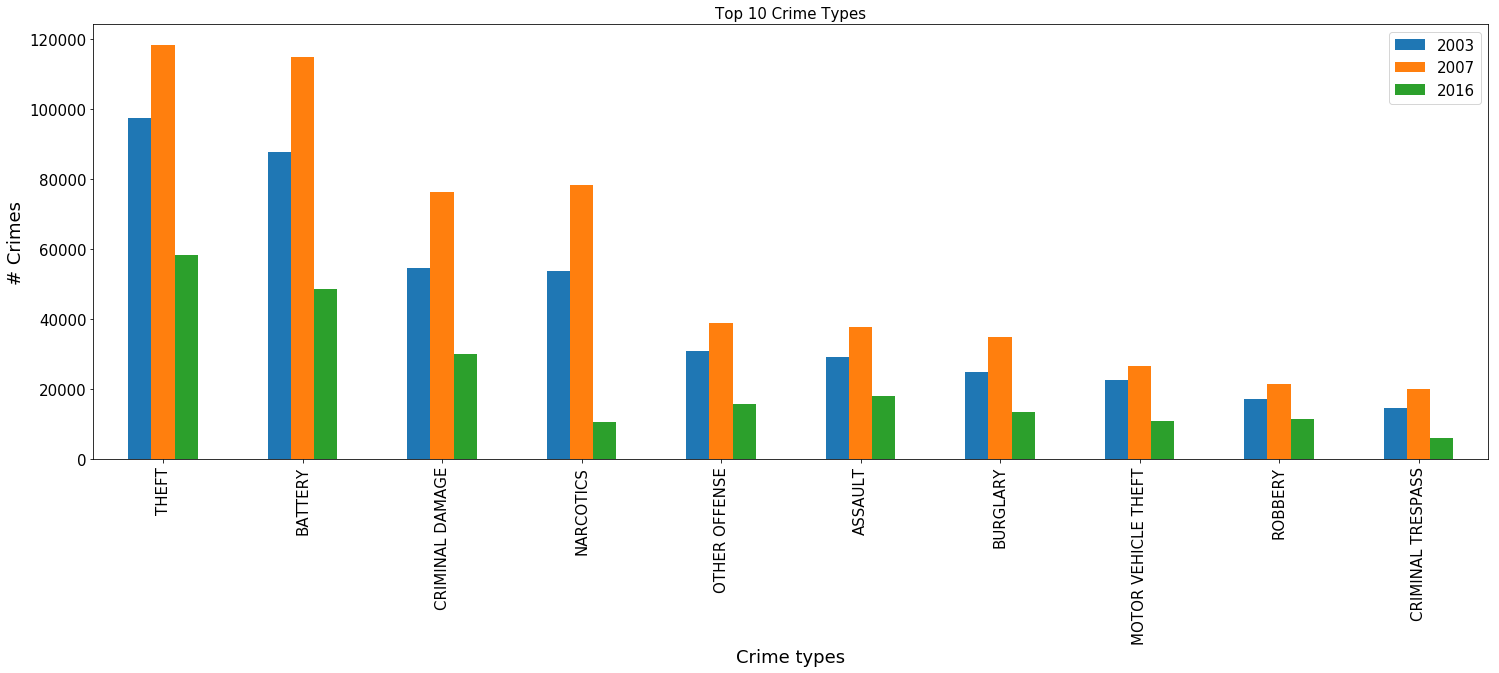

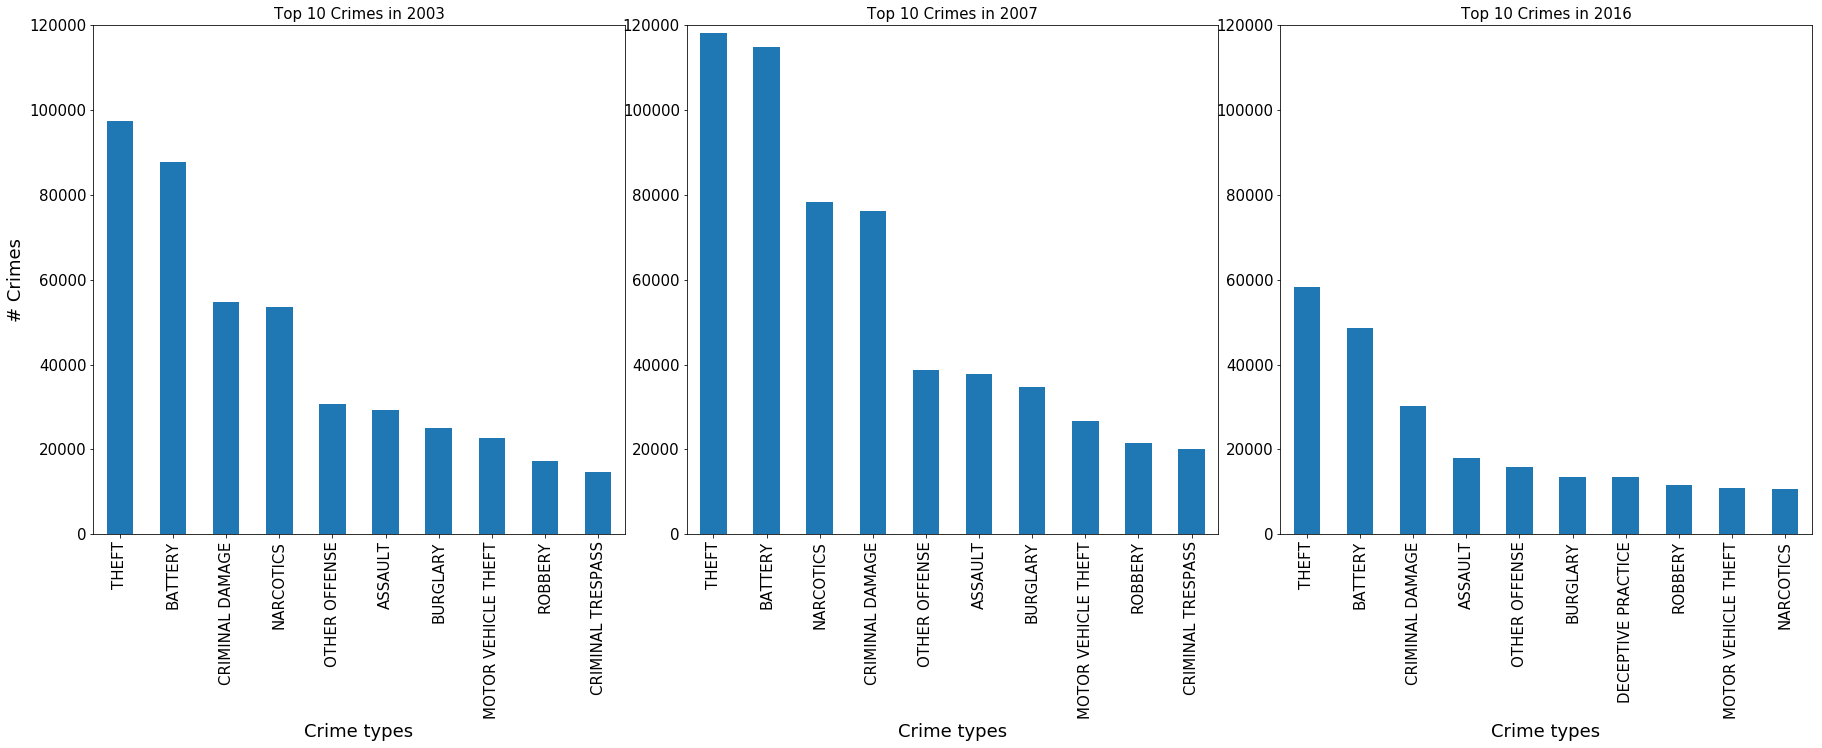

In [85]:
#%matplotlib inline

category = 'Primary Type'

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()
df_areas['2007'] = df_2007[category].value_counts()
df_areas['2016'] = df_2016[category].value_counts()

ax = df_areas[['2003', '2007', '2016']].head(10).plot(kind='bar', rot=90, title="Top 10 Crime Types");
ax.set_xlabel("Crime types")
ax.set_ylabel("# Crimes")

fig, axs = plt.subplots(1,3)

plt.tight_layout()

df_top_2003 = df_areas['2003']
df_top_2007 = df_areas['2007']
df_top_2016 = df_areas['2016']

ax_2003 = df_top_2003.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Top 10 Crimes in 2003");
ax_2003.set_ylim(0, 120000);
ax_2003.set_xlabel("Crime types");
ax_2003.set_ylabel("# Crimes");

ax_2007 = df_top_2007.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Top 10 Crimes in 2007");
ax_2007.set_ylim(0, 120000);
ax_2007.set_xlabel("Crime types");

ax_2016 = df_top_2016.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Top 10 Crimes in 2016");
ax_2016.set_ylim(0, 120000);
ax_2016.set_xlabel("Crime types");

#### Description
These graphs describe the numbers of the top 10 crimes happened in the years of 2003, 2007 and 2016. Theft and battery are the two most common types of crimes for all three years. Robbery and criminal trespass happened less frequently in these three years for the top 10 items. In the year 2007, all types of crimes happened most requently, and in 2016, they happened less frequently. 

#### Top crimes per community area (2003, 2007, 2016)

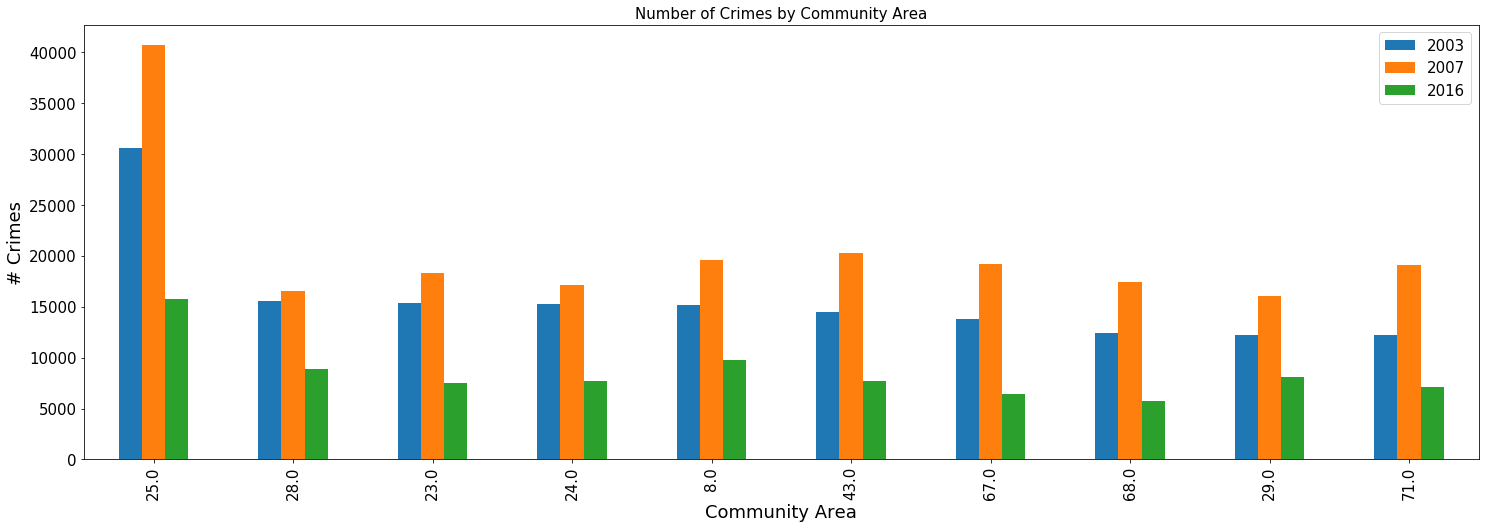

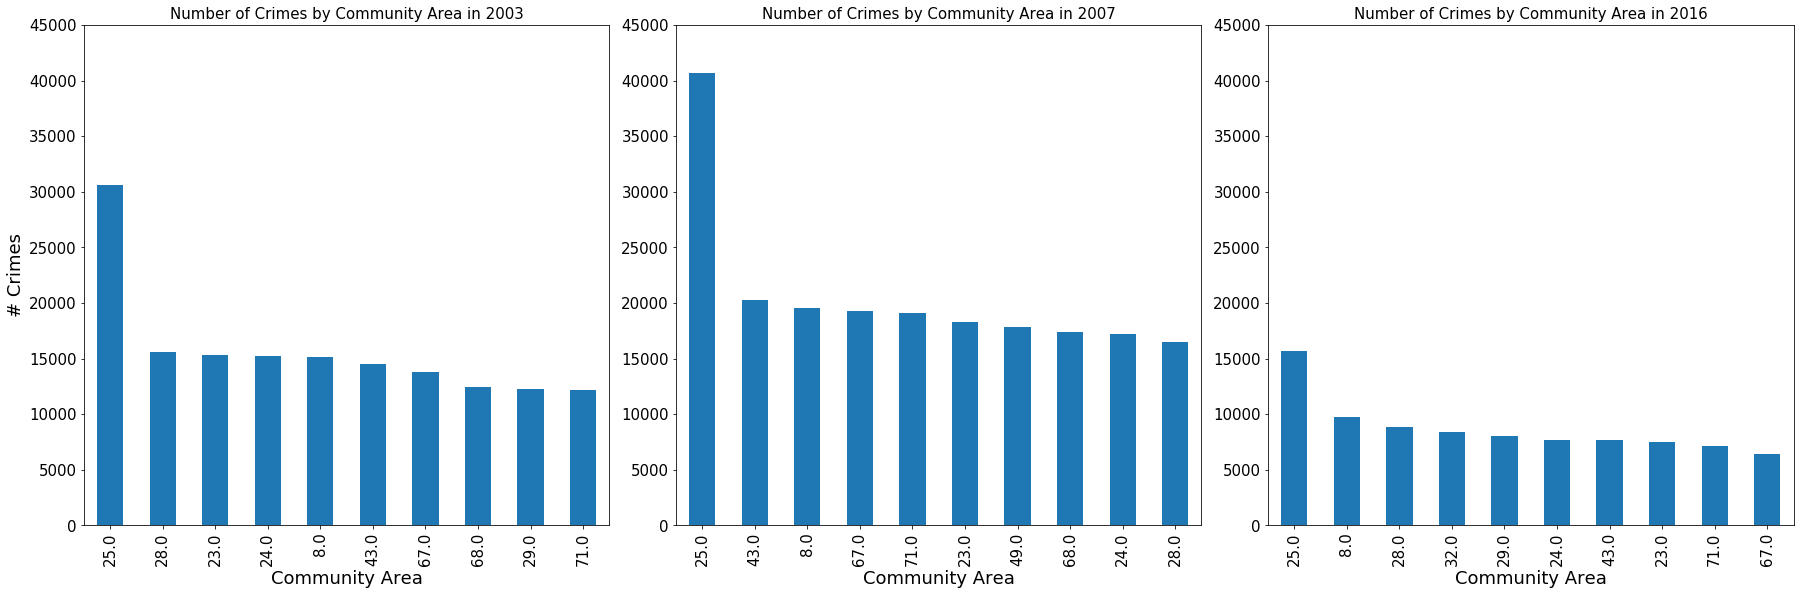

In [86]:
category = 'Community Area'

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()
df_areas['2007'] = df_2007[category].value_counts()
df_areas['2016'] = df_2016[category].value_counts()

plt.rcParams.update({'font.size': 22})
ax = df_areas.head(10).plot(kind='bar', rot=90, title="Number of Crimes by Community Area");
ax.set_xlabel("Community Area")
ax.set_ylabel("# Crimes")

fig, axs = plt.subplots(1,3)
plt.tight_layout()

plt.rcParams.update({'font.size': 18}) # Increase font size

ax_2003 = df_areas['2003'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Number of Crimes by Community Area in 2003");
ax_2003.set_ylim(0, 45000);
ax_2003.set_xlabel("Community Area");
ax_2003.set_ylabel("# Crimes");

ax_2007 = df_areas['2007'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Number of Crimes by Community Area in 2007");
ax_2007.set_ylim(0, 45000);
ax_2007.set_xlabel("Community Area");

ax_2016 = df_areas['2016'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Number of Crimes by Community Area in 2016");
ax_2016.set_ylim(0, 45000);
ax_2016.set_xlabel("Community Area");

#### Description
The graphs above show the number of crimes happened in 10 community areas in the years of 2003, 2007 and 2016. Overall, all 10 community areas had their highest numbers in 2007 and the lowest in 2016. 
The community area called 25.0 had much higher numbers of crimes than other 9 areas in these three years. The other 9 areas had similar numbers of crimes in these three years. In 2003, the areas of 29.0 and 71.0 had the lowest numbers. In 2007, area 28.0 had the lowest number. And area 67.0 had the lowest in 2016.

#### Top 3 crimes geospatially visualized (2003, 2007, 2016)

In [87]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

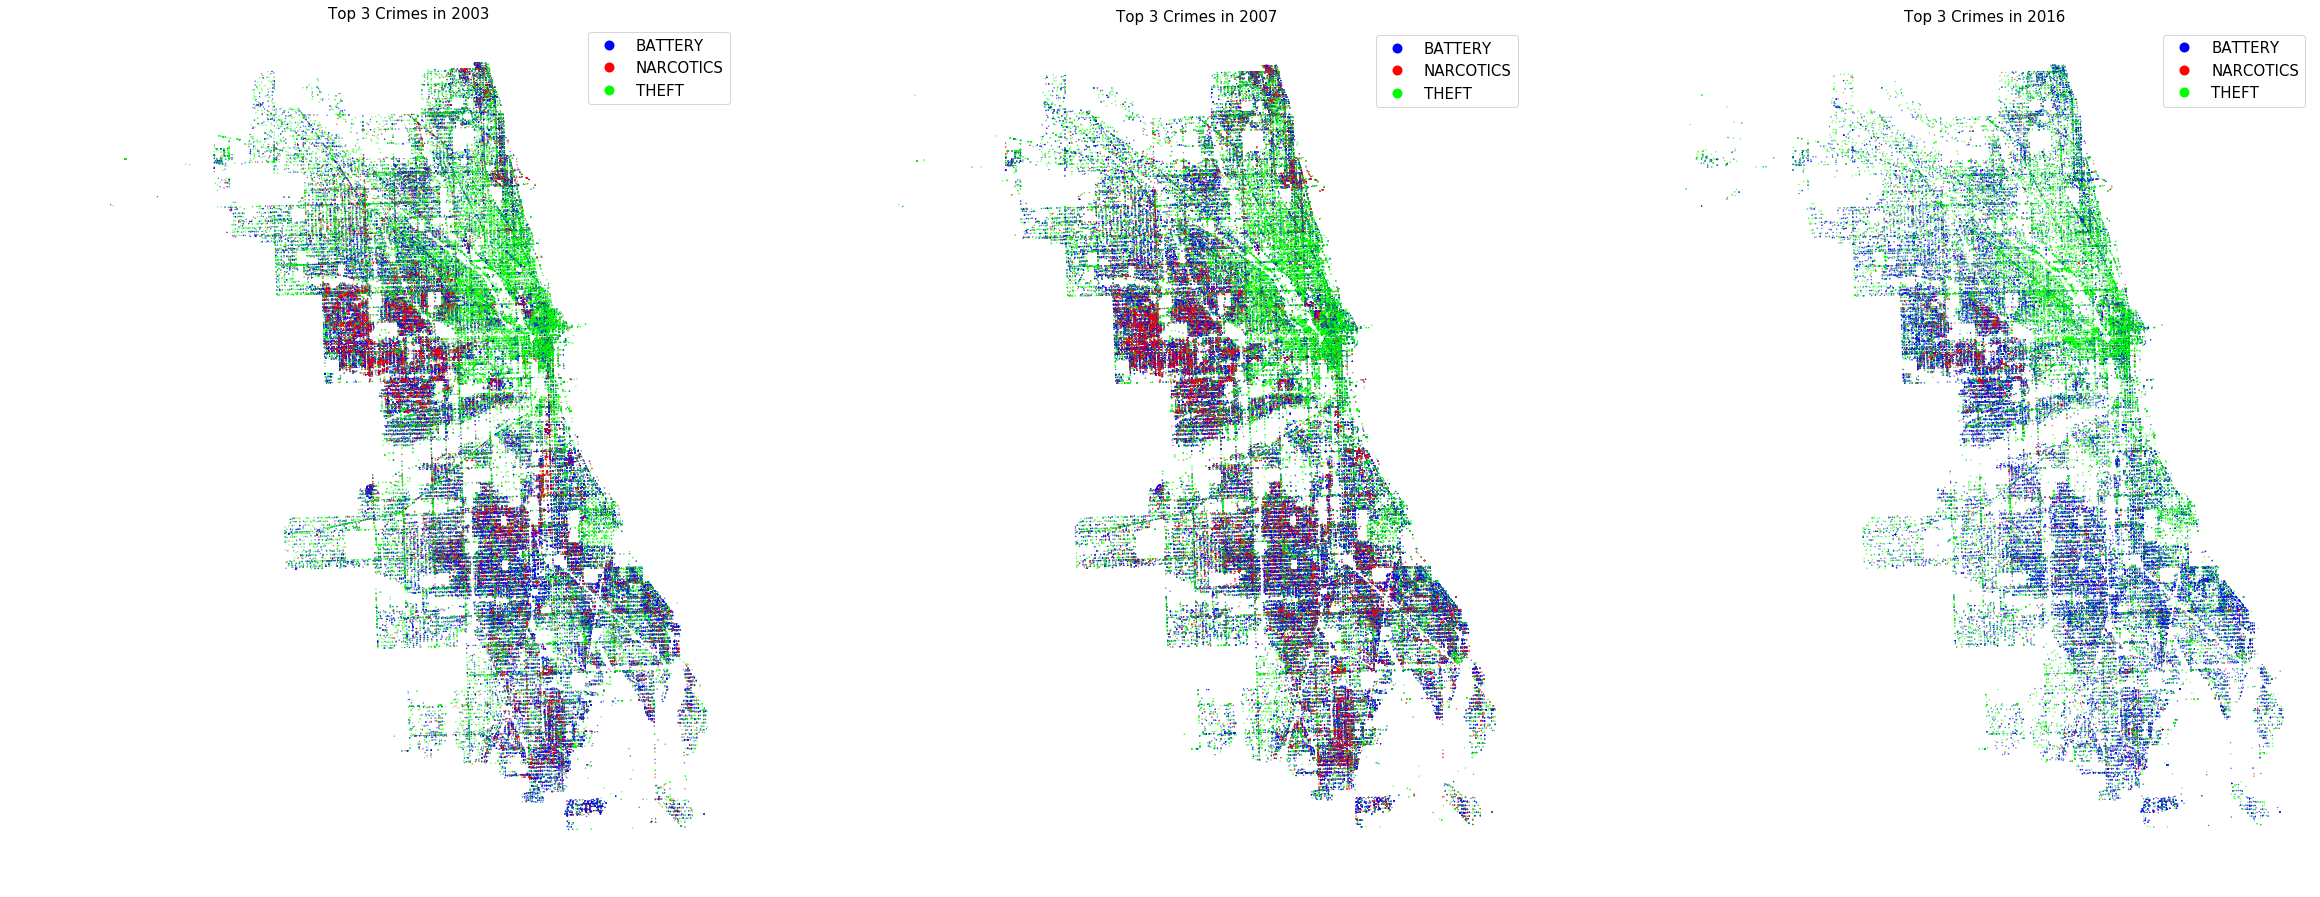

In [76]:
crs={'init':'epsg:4326'}
axs={}

# zip the Longtitude and Latitude together. Each point represents a row in Data frame
Geo_2003 = [Point(xy) for xy in zip (df_2003["X Coordinate"], df_2003["Y Coordinate"])]
Geo_2007 = [Point(xy) for xy in zip (df_2007["X Coordinate"], df_2007["Y Coordinate"])]
Geo_2016 = [Point(xy) for xy in zip (df_2016["X Coordinate"], df_2016["Y Coordinate"])]

crime_types = ["THEFT", "BATTERY", "NARCOTICS"]

Geo_df_2003 = gpd.GeoDataFrame(df_2003, crs=crs, geometry=Geo_2003)
Geo_df_2003_top_3 = Geo_df_2003[Geo_df_2003['Primary Type'].isin(crime_types)]

Geo_df_2007 = gpd.GeoDataFrame(df_2007, crs=crs, geometry=Geo_2007)
Geo_df_2007_top_3 = Geo_df_2007[Geo_df_2007['Primary Type'].isin(crime_types)]

Geo_df_2016 = gpd.GeoDataFrame(df_2016, crs=crs, geometry=Geo_2016)
Geo_df_2016_top_3 = Geo_df_2016[Geo_df_2016['Primary Type'].isin(crime_types)]

plt.rcParams['figure.figsize'] = (40, 20) #increase figure size
fig,axs = plt.subplots(1,3)

Geo_df_2003_top_3.plot(ax=axs[0],markersize=0.1, column='Primary Type', legend=True, cmap='brg').set_axis_off();
Geo_df_2007_top_3.plot(ax=axs[1],markersize=0.1, column='Primary Type', legend=True, cmap='brg').set_axis_off();
Geo_df_2016_top_3.plot(ax=axs[2],markersize=0.1, column='Primary Type', legend=True, cmap='brg').set_axis_off();

#ax.set_title('Crimes happened in Chicago in 2003')
axs[0].set_title('Top 3 Crimes in 2003');
axs[1].set_title('Top 3 Crimes in 2007');
axs[2].set_title('Top 3 Crimes in 2016');

#### Description
From the three graphs, more crimes happened in 2003 and 2007 than in 2016. In these three years, the middle left area had the largest number of narcotics crimes than other areas, and the middle right area and the top area had the largest number of theft crimes. In these three years, battery most happened in the bottom and the middle left areas in Chicago. 

#### Choropleth map of crimes geospatially visualized (2003, 2007, 2016)

In [88]:
newfd='data/Boundaries/geo_5.geojson'
map2_Chicago=gpd.read_file(newfd)
map2_Chicago.rename(columns={'area_num_1':'Area_num'},inplace=True)
map2_Chicago['Area_num']=pd.to_numeric(map2_Chicago['Area_num'])

In [89]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (25,10)
 #increase figure size

In [90]:
district2_2003=pd.DataFrame(df_2003['Community Area'].value_counts())
district2_2007=pd.DataFrame(df_2007['Community Area'].value_counts())
district2_2016=pd.DataFrame(df_2016['Community Area'].value_counts())


district2_2003=district2_2003.reset_index().rename(columns={'index':'Area_num','Community Area':'Num_crime'})
district2_2007=district2_2007.reset_index().rename(columns={'index':'Area_num','Community Area':'Num_crime'})
district2_2016=district2_2016.reset_index().rename(columns={'index':'Area_num','Community Area':'Num_crime'})

map2_2003=map2_Chicago.merge(district2_2003,on='Area_num')
map2_2007=map2_Chicago.merge(district2_2007,on='Area_num')
map2_2016=map2_Chicago.merge(district2_2016,on='Area_num');

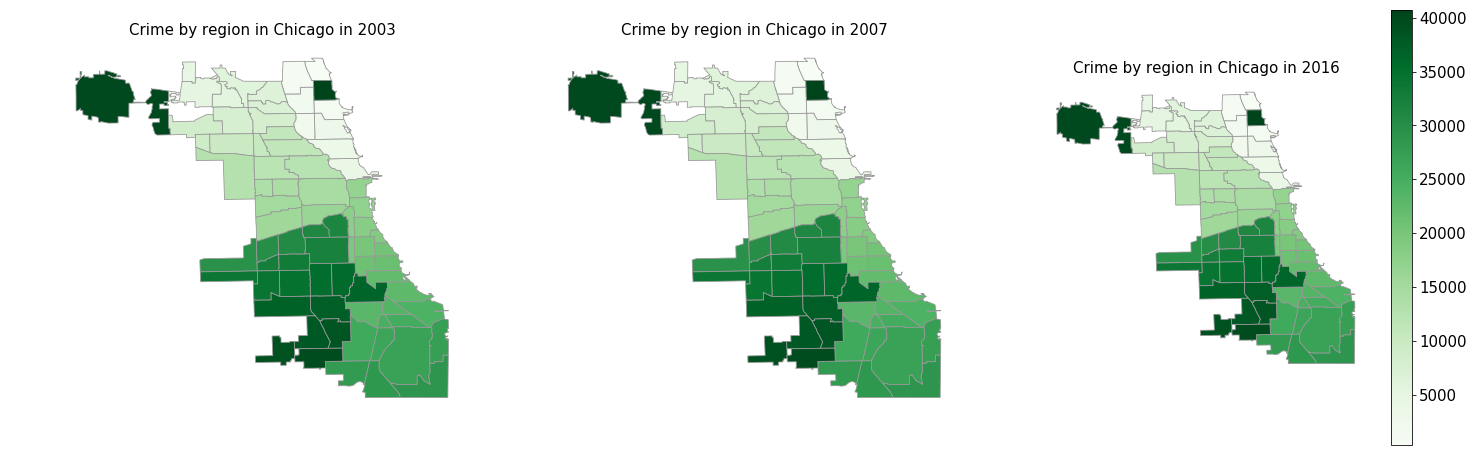

In [91]:
fig, axs = plt.subplots(1,3,figsize=(25,8))

sm = plt.cm.ScalarMappable(cmap='Greens')
sm.norm=plt.Normalize(vmin=min(min(map2_2003['Num_crime']),min(map2_2007['Num_crime']),min(map2_2016['Num_crime'])),
                   vmax=max(max(map2_2003['Num_crime']),max(map2_2007['Num_crime']),max(map2_2016['Num_crime'])))
sm._A= []

cbar = fig.colorbar(sm)
for ax in axs:
    ax.axis('off')

map2_2003.plot(column="Area_num", cmap='Greens', linewidth=0.8, ax=axs[0], edgecolor='0.6')
axs[0].set_title('Crime by region in Chicago in 2003')
map2_2007.plot(column="Area_num", cmap='Greens', linewidth=0.8, ax=axs[1], edgecolor='0.6')
axs[1].set_title('Crime by region in Chicago in 2007')
map2_2016.plot(column="Area_num", cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.6')
axs[2].set_title('Crime by region in Chicago in 2016');


#### Description
This choropleth map plots where crimes happened in Chicago in 2003, 2007, 2016. Amoung these three years, the pattern of geographical distribution of crimes generally remains the same.
From the map, we can tell crimes mostly happen in the Middle,South-West part,as well as North-Western part of Chicago. And, a police district at North-Eastern Chicago,unlike the police district around it, shows a record of huge numbers of crimes.

### ANALYSIS III: Crime vs Income (2008-2012)

#### Group 2008-2012 data into one dataframe by disctrict

In [92]:
# Combine datasets
df_2008_2012 = pd.concat(datasets_by_area)

# Get count of number of crimes
df_2008_2012['Num Crimes'] = 1

# Drop unnecessary columns
df_2008_2012.drop(columns=['Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year'], axis=1, inplace=True)

# Group by community area
df_2008_2012 = df_2008_2012.groupby(['Community Area']).sum()

# Drop unnecessary first row
df_2008_2012.drop([0], inplace=True)

# Read in income data
df_income = pd.read_csv("./data/Per_Capita_Income.csv", index_col=0)
df_income.index.names = ['Community Area']

# Join Dataframes
df_2008_2012 = df_2008_2012.join(df_income, how='outer')

# Rename column (to remove space)

"""df_2008_2012.rename(columns={"PER CAPITA INCOME ": "Per_Capita_Income",'Num Crimes':'Num_Crimes',
                             'COMMUNITY AREA NAME':'Area_name','PERCENT OF HOUSING CROWDED':'%Housing_Crowded',
                             'PERCENT HOUSEHOLDS BELOW POVERTY':'%Househole_below_prov',
                             'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA':'%Bad_Education',
                             'PERCENT AGED UNDER 18 OR OVER 64':'%Under18_and_Over64',
                             'PERCENT AGED 16+ UNEMPLOYED':'%Unemployed_Over16',
                             'HARDSHIP INDEX':'Hardship'}, inplace=True)"""

df_2008_2012.rename(columns={"PER CAPITA INCOME ": "Per_Capita_Income", 'Num Crimes':'Num_Crimes'}, inplace=True)

In [41]:
df_2008_2012.corr()

,Num_Crimes,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,Per_Capita_Income,HARDSHIP INDEX
Num_Crimes,1.000000,0.133686,0.294305,0.245818,0.060150,-0.117719,-0.007643,0.194883
PERCENT OF HOUSING CROWDED,0.133686,1.000000,0.319403,0.165299,0.875959,0.224692,-0.541730,0.649574
PERCENT HOUSEHOLDS BELOW POVERTY,0.294305,0.319403,1.000000,0.800084,0.424294,0.435894,-0.567025,0.803267
PERCENT AGED 16+ UNEMPLOYED,0.245818,0.165299,0.800084,1.000000,0.355518,0.676532,-0.656619,0.792294
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,0.060150,0.875959,0.424294,0.355518,1.000000,0.408878,-0.709770,0.802538
PERCENT AGED UNDER 18 OR OVER 64,-0.117719,0.224692,0.435894,0.676532,0.408878,1.000000,-0.754844,0.690844
Per_Capita_Income,-0.007643,-0.541730,-0.567025,-0.656619,-0.709770,-0.754844,1.000000,-0.849167
HARDSHIP INDEX,0.194883,0.649574,0.803267,0.792294,0.802538,0.690844,-0.849167,1.000000


#### Graph Per capita income vs. Num Crimes

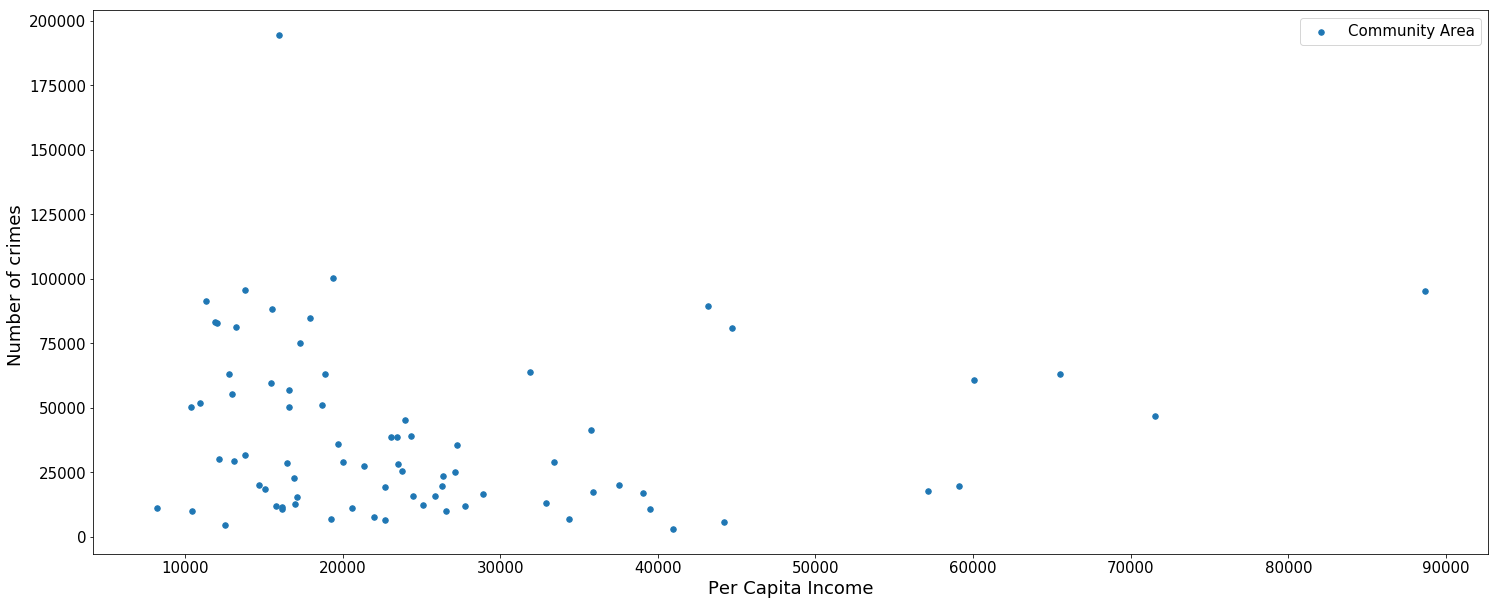

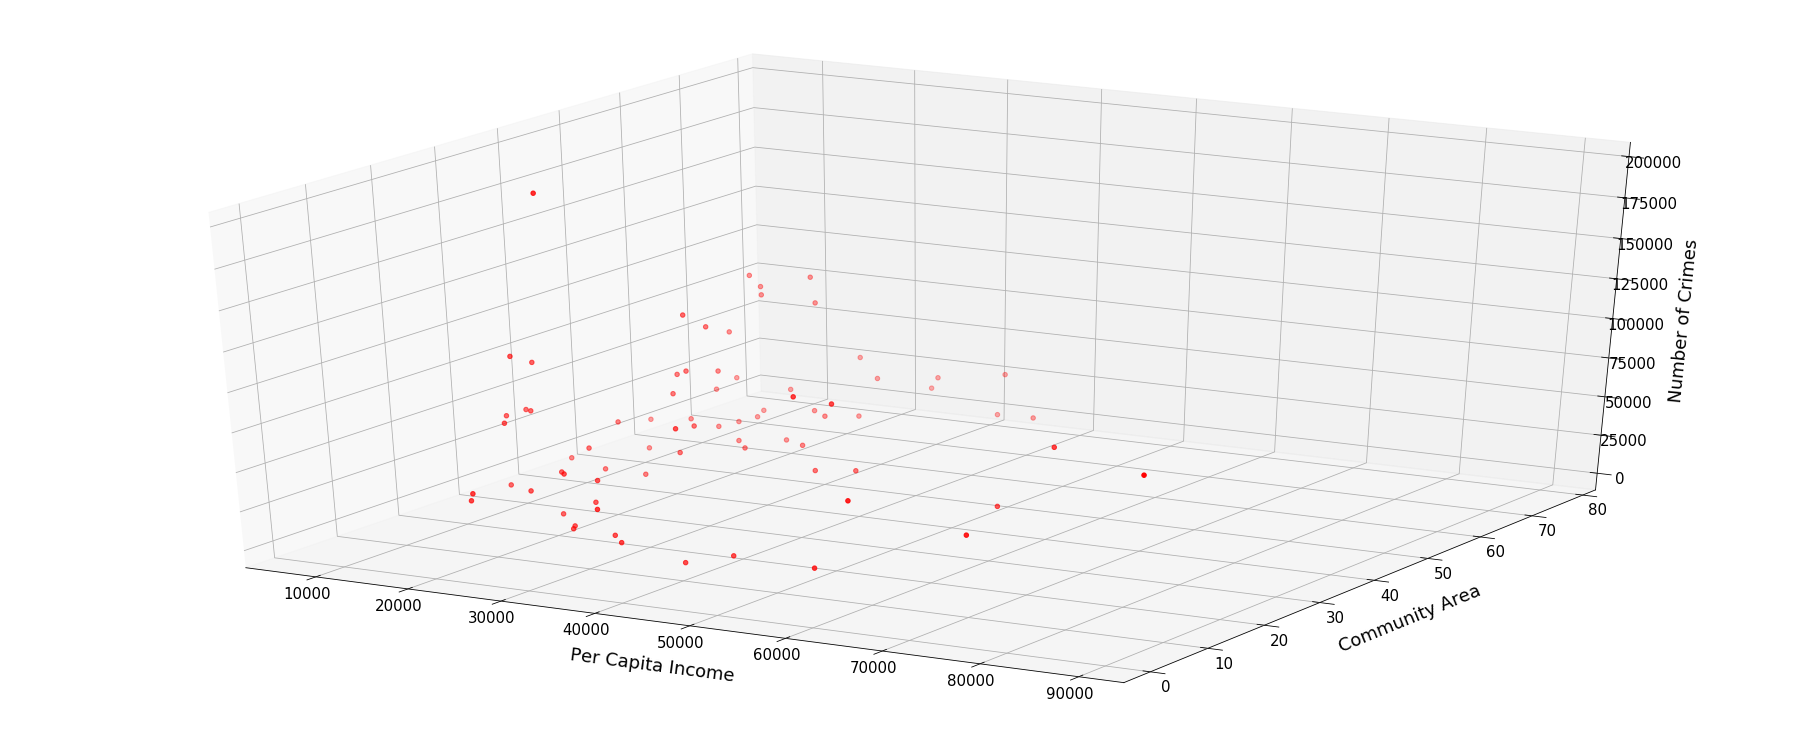

In [93]:
df_2008_2012.plot.scatter(x='Per_Capita_Income', y='Num_Crimes',s=30,label='Community Area');
plt.xlabel('Per Capita Income')
plt.ylabel('Number of crimes ');

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_2008_2012['Per_Capita_Income'],df_2008_2012.index, df_2008_2012['Num_Crimes'], c = 'r', marker='o')
ax.set_xlabel('\n\nPer Capita Income');
ax.set_ylabel('\n\nCommunity Area');
ax.set_zlabel('\n\nNumber of Crimes');

#### Description 
From the graph, most areas had their per capita incomes in the range of 10,000 to 40,000. Most values for crimes were in the range between 7,000 and 100,000. Regardless of the outliers, the areas with 10,000 to 20,000 per capita income had the broadest range of numbers of crimes, which was from about 7,000 to 100,000. The areas with 20,000 to 40,000 per capita income had the narrowest range of numbers of crimes, which was from about 7,000 to 50,000. From the graph, there is a rough tendency that areas with low per capita income would more likely have higher numbers of crimes than those in high-income community.

#### Outliers
There is one main outlier in terms of number of crimes. Community Area 25 (Austin) has almost 200,000 crimes per year, almost twice that of the next highest. We chose to include this outlier as we felt that in an analysis on the number of crime, the datapoint with the highest number of crimes was of great significance. Additionally, there are a number of outliers in terms of income above 50,000. The data graphed without these outliers is displayed below.

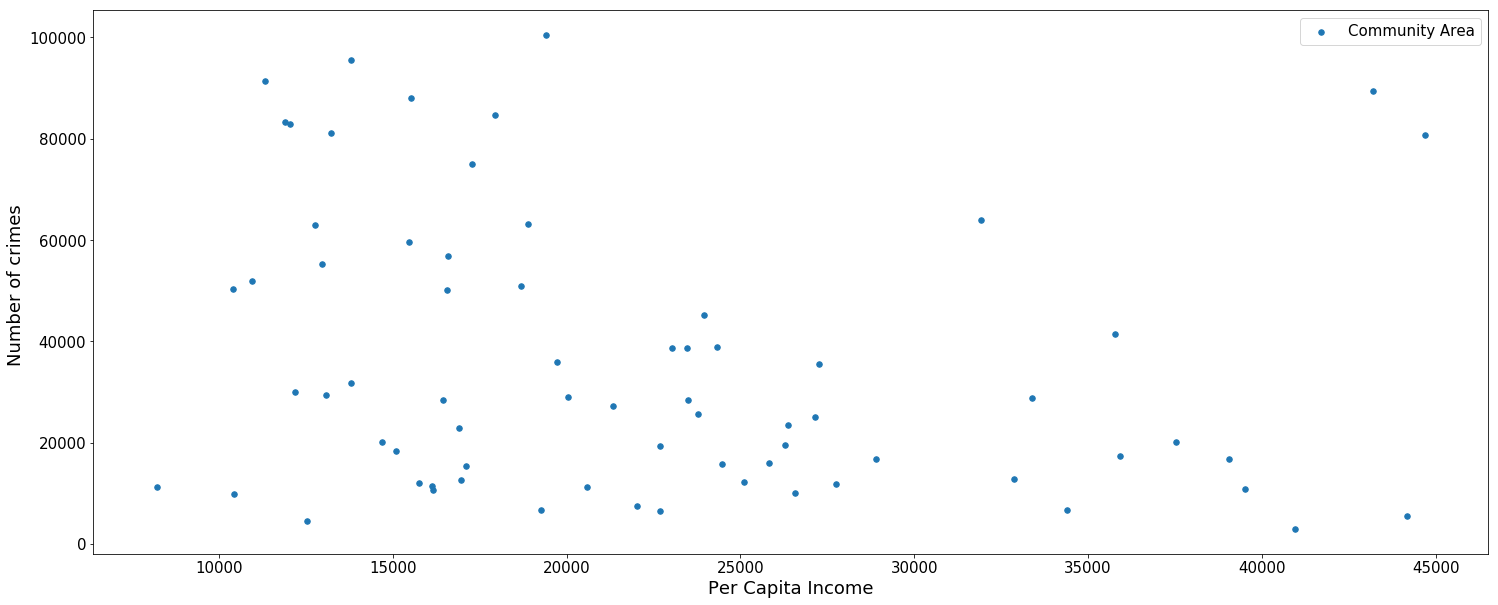

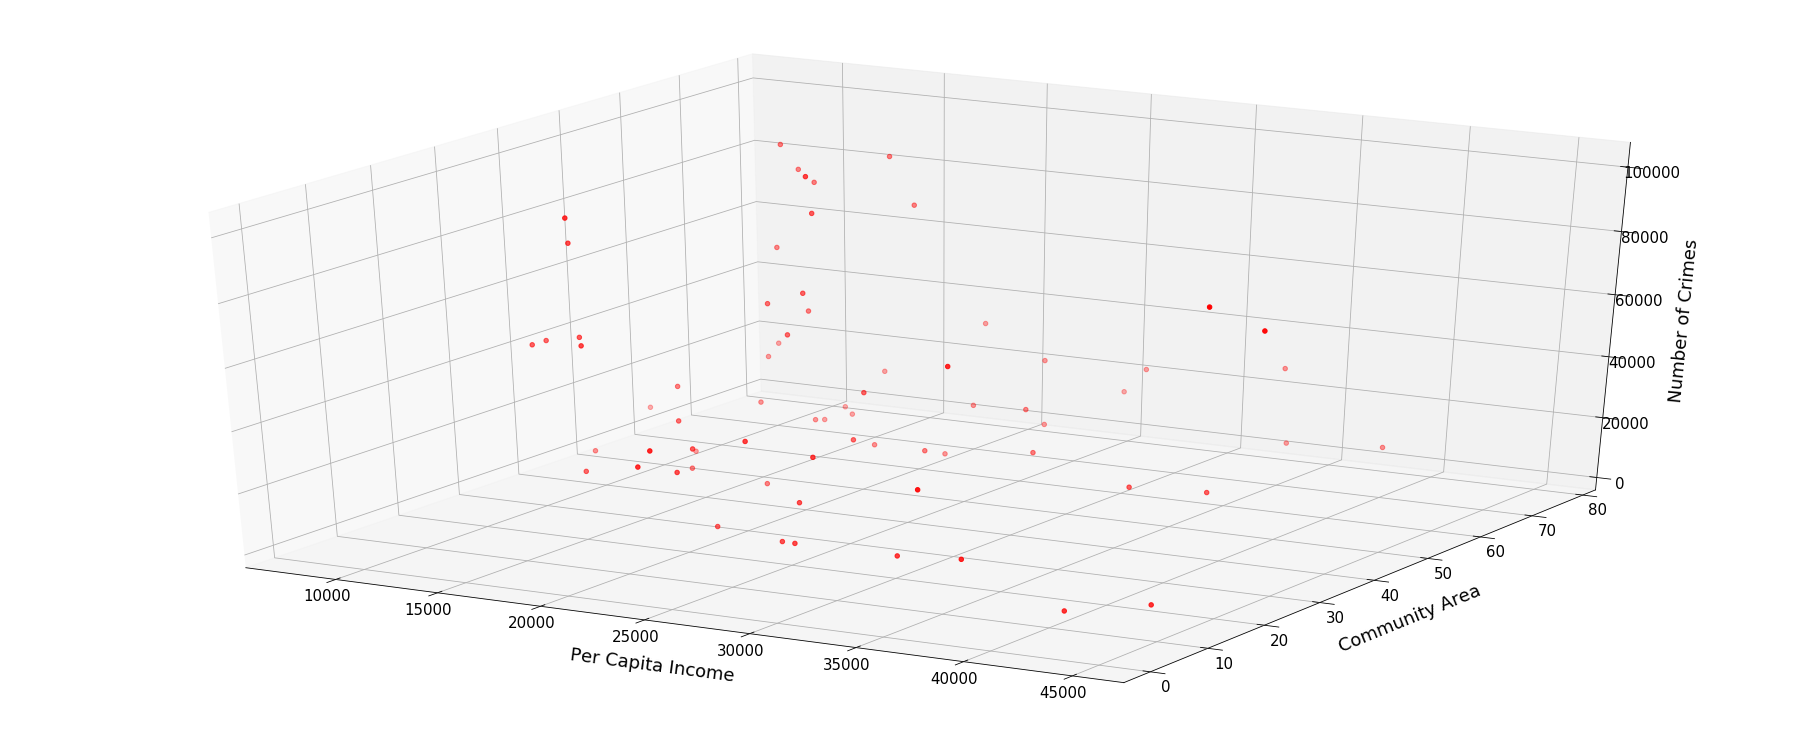

In [94]:
df_anlz = df_2008_2012[(df_2008_2012["Per_Capita_Income"] < 50000) & (df_2008_2012["Num_Crimes"] < 125000)]
df_anlz.plot.scatter(x='Per_Capita_Income', y='Num_Crimes',s=30,label='Community Area');
plt.xlabel('Per Capita Income')
plt.ylabel('Number of crimes ');

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_anlz['Per_Capita_Income'], df_anlz.index, df_anlz['Num_Crimes'], c = 'r', marker='o')
ax.set_xlabel('\n\nPer Capita Income');
ax.set_ylabel('\n\nCommunity Area');
ax.set_zlabel('\n\nNumber of Crimes');

#### Correlation between per capita income and number of crimes

The following graph shows the distribution of per capita income of the community.

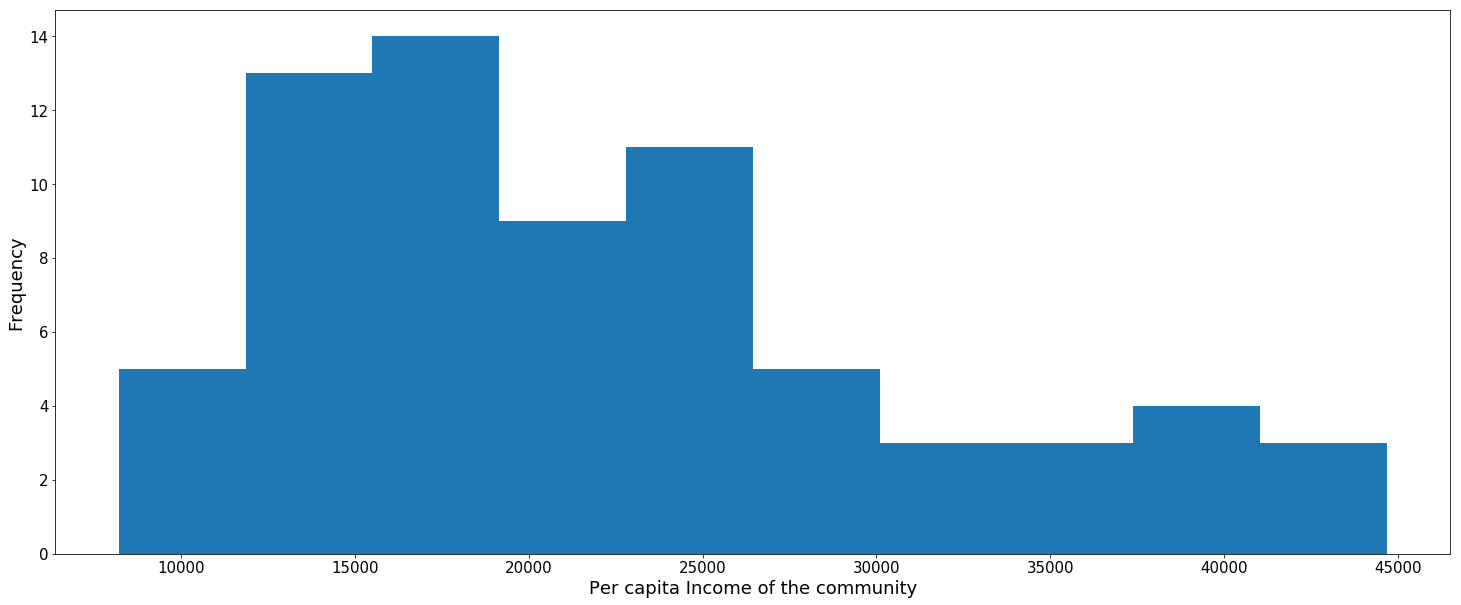

In [95]:
plt.rcParams['figure.figsize'] = (25,10)
plt.hist(df_anlz['Per_Capita_Income'],bins=10);
plt.xlabel('Per capita Income of the community')
plt.ylabel('Frequency');

In order to perform a linear regression, we hope to obtain a normally distributed data. Therefore, we use log transformation on numbers of crimes.

/anaconda/envs/cogs108/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


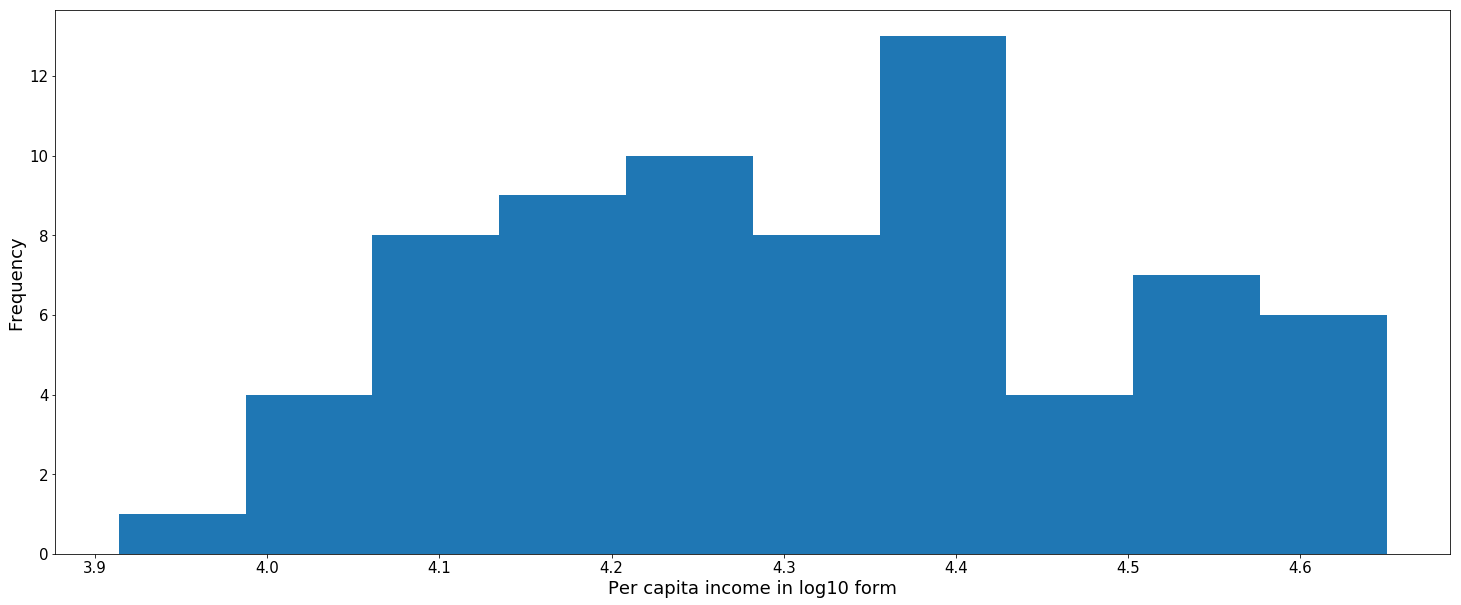

In [101]:
df_anlz['Per_Capita_Income10']=df_anlz['Per_Capita_Income'].apply(np.log10)
plt.hist(df_anlz['Per_Capita_Income10'],bins=10);
plt.xlabel('Per capita income in log10 form')
plt.ylabel('Frequency');

#### Linear regression

Below we use OLS model to find out the linear regression  result of log10 of Per capita income.

In [102]:
outcome, predictors = patsy.dmatrices('Num_Crimes ~ Per_Capita_Income10', df_anlz)
mod = sm_.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Num_Crimes   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.744
Date:                Thu, 06 Jun 2019   Prob (F-statistic):             0.0329
Time:                        18:35:22   Log-Likelihood:                -811.63
No. Observations:                  70   AIC:                             1627.
Df Residuals:                      68   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.059e+05   7

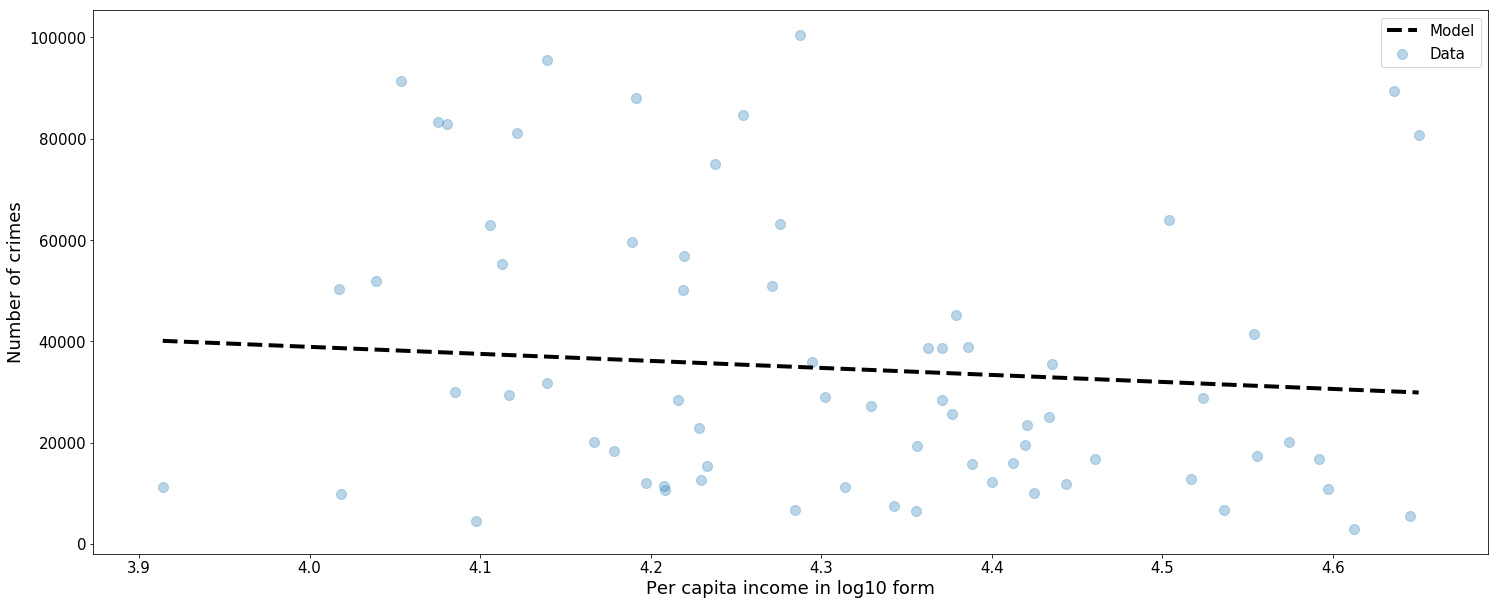

In [103]:
# Plot the orginal data (as before)
plt.scatter(df_anlz['Per_Capita_Income10'],df_anlz['Num_Crimes'], alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs = np.linspace(df_anlz['Per_Capita_Income10'].min(), df_anlz['Per_Capita_Income10'].max())
ys=-1.385e+04*xs+ 9.431e+04
plt.plot(xs,ys,'--k',linewidth=4, label='Model')
plt.xlabel('Per capita income in log10 form')
plt.ylabel('Number of crimes')
plt.legend();

#### Description
Based on the OLS linear regression result, we shall accept the null hyphothesis. There is barely no relationship between the per capita income and number of crimes in each community area. Therefore, it is hard to tell whether per-capita-income contributes to the number of crimes.

#### Linear regression when treating per capita income as a bimodal distribution

Shown in previous graph, it is possible that per capita income is bimodally distributed. In order to fully test the relationship, we attach 'High_Income' label to each area. If per capita income of the community area is greater than 20000, we attach 1 to this community representing high income. Otherwise, we attach 0 to this community.

In [104]:
df_anlz['High_Income']=df_anlz['Per_Capita_Income'].apply(lambda x: 0 if x < 20000 else 1)

/anaconda/envs/cogs108/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


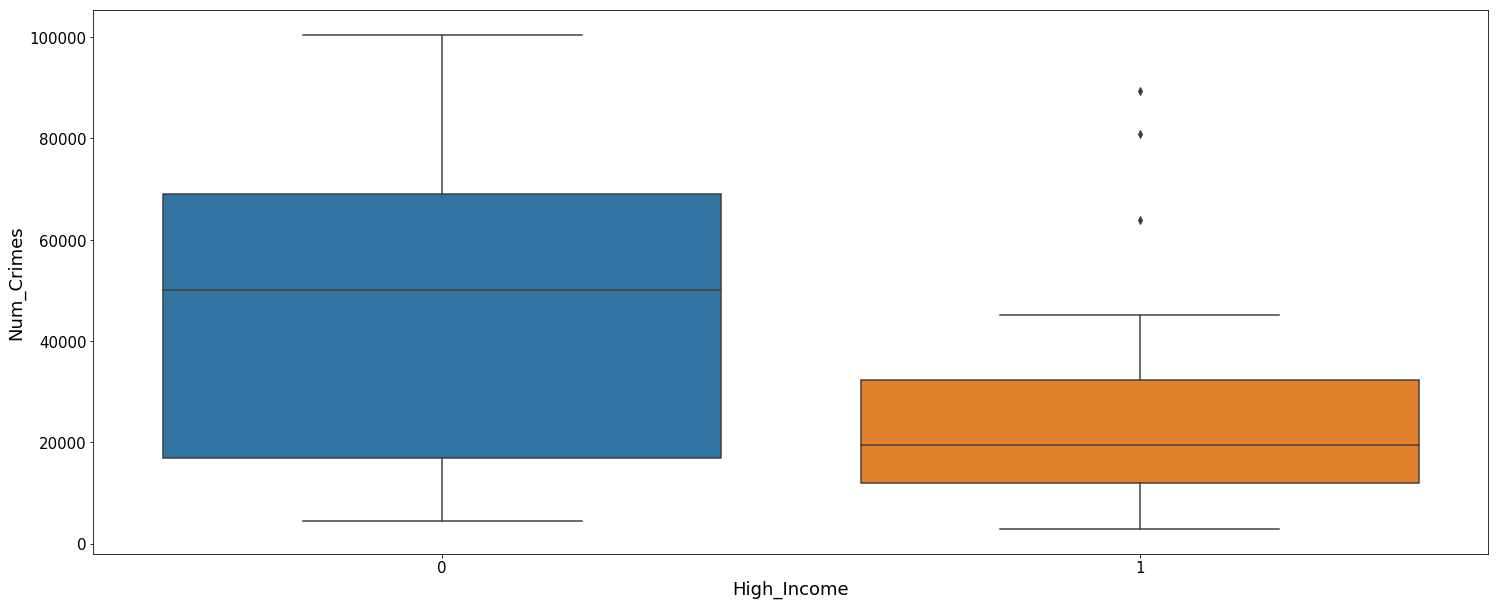

In [105]:
sns.boxplot(x='High_Income', y='Num_Crimes', data=df_anlz);

In [106]:
outcome, predictors = patsy.dmatrices('Num_Crimes ~ High_Income', df_anlz)
mod = sm_.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Num_Crimes   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     10.48
Date:                Thu, 06 Jun 2019   Prob (F-statistic):            0.00187
Time:                        18:35:37   Log-Likelihood:                -808.97
No. Observations:                  70   AIC:                             1622.
Df Residuals:                      68   BIC:                             1626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.557e+04   4335.498     10.511      

#### Description
As p-value of this Regression result, we still considering the relation between them as a really weak one. However, with 0.07 R-squared score, High Income could be take into consideration as a supplementary indicator.

### ETHICS & PRIVACY
In any project utilizing data, there will be some potential ethics and privacy issues. Doing such research in some ways might expose some information from the people who don't want to release their personal details. However, this data has been publicly released and cleaned to remove all identifying information.

All of our data was released by the Chicago police department. Depending on your beliefs, this might introduce some kind of bias. However, for the most part, this data is very objective - only logging and categorizing different crimes instead of analyzing them. It seems to be perfectly usable for equitable analysis - as the only information includes crimes in Chicago, which is ultimately what the project is about.

Because our data was released from a reputable source and was stripped of all identifying information, most data privacy concerns have been nullified.

### CONCLUSION & DISCUSSION
- Discuss your project. Summarize your data and question. Briefly describe your analysis. Summarize your results and conclusions. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (2-3 paragraphs)

### WORKS CITED
Sanburn, Josh. “Chicago Responsible for Nearly Half of U.S. Homicide Spike.” Time, Time, 19 Sept. 2016, time.com/4497814/chicago-murder-rate-u-s-crime/.

Nolan, Lauren. “A Deepening Divide: Income Inequality Grows Spatially in Chicago.” VOORHEESCENTER, 11 Mar. 2015, voorheescenter.wordpress.com/2015/03/11/a-deepening-divide-income-inequality-grows-spatially-in-chicago/?fbclid=IwAR36emFf_DB4CcoscDOCfesOxFmNE5FtosUul6TzXX0uzl2ttKvO7qIXcSQ.